# RoboGarden Bootcamp Week 6 CNN Mission

In [1]:
#Import General Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import livelossplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Step 1 Load the built-in MNIST dataset from the keras.datasets library
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


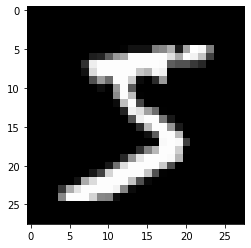

In [3]:
plt.imshow(x_train[0], cmap='gray')

In [4]:
# Step 2 Reshape x_train and x_test as follows into 60000 & 10000 sets (28 x 28 pixels) and add a fourth 
# dimension of size 1 (CNN expects 4 dimensions) and normailze by dividing by 255 maximum value for gray scale  :

x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255


### Build a CNN Use a CNN that has the following architecture:

    #The input layer is a 2-D convolutional layer
    #The first hidden layer is a 2-D max pooling layer
    #The second hidden layer is a flattening layer
    #The third hidden layer is a fully-connected layer
    #The output layer is a fully-connected layer
    #Run the model for 100 epochs per the Mission description


In [5]:
# Initiaize the model
from keras import Sequential
model = Sequential()

In [6]:
# Add First 2D Convolution layer with 28 outputs and a 3x3 convolution window
from keras.layers import Conv2D
model.add(Conv2D(28, (3,3), input_shape = (28, 28, 1),  activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Add a hidden max pooling layer with pool size of 2x2
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size = (2,2)))

In [8]:
# Add a flattening layer as the seconf hidden layer
from keras.layers import Flatten
model.add(Flatten())

In [9]:
# Add a third hidden layer that is fully connected with 128 units and relu for activation
from keras.layers import Dense
model.add(Dense(units = 128, activation = 'relu'))

In [10]:
# Add the output layer - a fully connected layer with 10 output layers 
#(0 - 9 for handwritten digits) and softmax as the activator
model.add(Dense(units = 10, activation = 'softmax'))

In [11]:
# complile the model with loss as  "sparse categorical crossentropy", "accuracy" for metrics and "adam" to optimize
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
# Add liveloss plot as a callbacks to monitor progress when fitting below
live_plot = livelossplot.PlotLossesKeras()

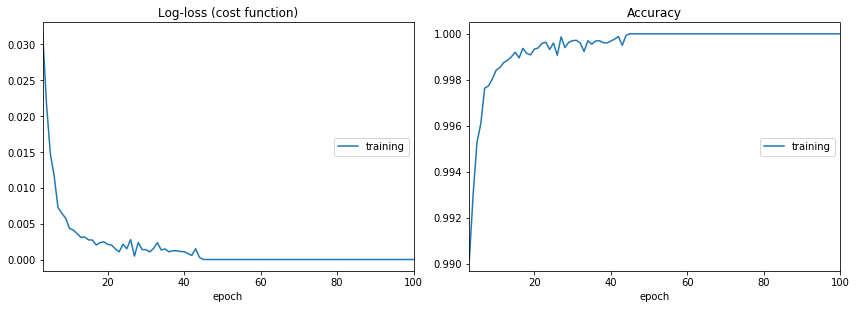

Log-loss (cost function):
training   (min:    0.000, max:    0.150, cur:    0.000)

Accuracy:
training   (min:    0.955, max:    1.000, cur:    1.000)


In [13]:
# Fit the model & train for 100 epochs initially, livelossplot in callbacks
model.fit(x_train, y_train, callbacks = [live_plot], epochs = 100)

In [14]:
# Test the CNN after 100 epochs
loss, accuracy = model.evaluate(x_test, y_test)
print('loss is:  ', loss, '  ; accuracy is: ',accuracy)

10000/10000 [==============================] - 2s 218us/step
loss is:   0.09197440066435192   ; accuracy is:  0.9896


In [15]:
# Save the model
model.save("Week_6_Mission_CNN_Handwriting_model.h5")
print("Saved model to disk")

Saved model to disk


### In this run 100 epochs was excessive.  A run of 50 to 60 would have been better or use early stopping.